# EE 511 Assignment 4 - PartI
University of Washington<br>
Code by John Ragland and Doruk Arisoy<br>
Winter 2021

In [1]:
# Suppress Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import tools
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Generate samples

In [2]:
x1_train, x2_train, labels_train = tools.generate_data(500) 
np.bincount(labels_train) / 500.0

array([0.208, 0.086, 0.47 , 0.236])

In [3]:
x1_valid, x2_valid, labels_valid = tools.generate_data(500) 
np.bincount(labels_valid) / 500.0

array([0.226, 0.072, 0.442, 0.26 ])

In [4]:
x1_test, x2_test, labels_test = tools.generate_data(1000) 
np.bincount(labels_test) / 500.0

array([0.462, 0.168, 0.916, 0.454])

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 15)
        self.fc2 = nn.Linear(15, 4)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [12]:
BATCH_SIZE = 10
TEST_BATCH_SIZE = 1000
EPOCHS = 140
LEARNING_RATE = 0.18
MOMENTUM = 0.5
SEED = 0
LOG_INTERVAL = 100

In [13]:
torch.manual_seed(SEED)
device = torch.device("cpu")
print('Using device', device)
import multiprocessing
print('num cpus:', multiprocessing.cpu_count()) 
criterion = nn.CrossEntropyLoss()

Using device cpu
num cpus: 4


In [14]:
data_train = torch.Tensor(np.array([x1_train, x2_train]).T)
data_train = TensorDataset(data_train, torch.tensor(labels_train, dtype=torch.long, device=device))
data_valid = torch.Tensor(np.array([x1_valid, x2_valid]).T)
data_valid = TensorDataset(data_valid, torch.tensor(labels_valid, dtype=torch.long, device=device))
data_test = torch.Tensor(np.array([x1_test, x2_test]).T)
data_test = TensorDataset(data_test, torch.tensor(labels_test, dtype=torch.long, device=device))

train_loader = DataLoader(dataset = data_train, batch_size = BATCH_SIZE, shuffle = True) 
valid_loader = DataLoader(dataset = data_valid, batch_size = BATCH_SIZE,  shuffle = False)
test_loader = DataLoader(dataset = data_test, batch_size = BATCH_SIZE,  shuffle = False)

In [9]:
best_lr = 0
best_result = 0
for lr in np.arange(0, 0.2, 0.01):
    model = Net()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=MOMENTUM)
    tools.train(model, device, train_loader, optimizer, EPOCHS, LOG_INTERVAL, criterion)
    result = tools.test(model, device, valid_loader, criterion)
    if result > best_result:
        best_result = result
        best_lr = lr

LEARNING_RATE = best_lr
print('Best learning rate %.2f' % LEARNING_RATE)

Test set: Average loss: 0.1351, Accuracy: 156/500 (31%)
Test set: Average loss: 0.1050, Accuracy: 277/500 (55%)
Test set: Average loss: 0.0725, Accuracy: 340/500 (68%)
Test set: Average loss: 0.0646, Accuracy: 350/500 (70%)
Test set: Average loss: 0.0630, Accuracy: 378/500 (76%)
Test set: Average loss: 0.0651, Accuracy: 358/500 (72%)
Test set: Average loss: 0.0573, Accuracy: 390/500 (78%)
Test set: Average loss: 0.0528, Accuracy: 399/500 (80%)
Test set: Average loss: 0.0538, Accuracy: 401/500 (80%)
Test set: Average loss: 0.0537, Accuracy: 380/500 (76%)
Test set: Average loss: 0.0466, Accuracy: 403/500 (81%)
Test set: Average loss: 0.0585, Accuracy: 368/500 (74%)
Test set: Average loss: 0.0502, Accuracy: 395/500 (79%)
Test set: Average loss: 0.0469, Accuracy: 408/500 (82%)
Test set: Average loss: 0.0509, Accuracy: 400/500 (80%)
Test set: Average loss: 0.0554, Accuracy: 382/500 (76%)
Test set: Average loss: 0.0564, Accuracy: 392/500 (78%)
Test set: Average loss: 0.0493, Accuracy: 393/50

In [10]:
best_epoch = 0
best_result = 0
for epoch in np.arange(0, 200, 10):
    model = Net()
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
    tools.train(model, device, train_loader, optimizer, epoch, LOG_INTERVAL, criterion)
    result = tools.test(model, device, valid_loader, criterion)
    if result > best_result:
        best_result = result
        best_epoch = epoch

EPOCHS = best_epoch
print('Best number of epochs %.2f' % EPOCHS)

Test set: Average loss: 0.1230, Accuracy: 237/500 (47%)
Test set: Average loss: 0.0907, Accuracy: 327/500 (65%)
Test set: Average loss: 0.0750, Accuracy: 316/500 (63%)
Test set: Average loss: 0.0683, Accuracy: 356/500 (71%)
Test set: Average loss: 0.0680, Accuracy: 364/500 (73%)
Test set: Average loss: 0.0697, Accuracy: 344/500 (69%)
Test set: Average loss: 0.0667, Accuracy: 337/500 (67%)
Test set: Average loss: 0.0633, Accuracy: 361/500 (72%)
Test set: Average loss: 0.0510, Accuracy: 401/500 (80%)
Test set: Average loss: 0.0536, Accuracy: 393/500 (79%)
Test set: Average loss: 0.0548, Accuracy: 385/500 (77%)
Test set: Average loss: 0.0513, Accuracy: 385/500 (77%)
Test set: Average loss: 0.0550, Accuracy: 397/500 (79%)
Test set: Average loss: 0.0533, Accuracy: 391/500 (78%)
Test set: Average loss: 0.0436, Accuracy: 436/500 (87%)
Test set: Average loss: 0.0473, Accuracy: 407/500 (81%)
Test set: Average loss: 0.0410, Accuracy: 433/500 (87%)
Test set: Average loss: 0.0583, Accuracy: 406/50

In [15]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)
tools.train(model, device, train_loader, optimizer, EPOCHS, LOG_INTERVAL, criterion)

## Evaluation

In [16]:
tools.test(model, device, test_loader, criterion)

Test set: Average loss: 0.0448, Accuracy: 829/1000 (83%)


82.9

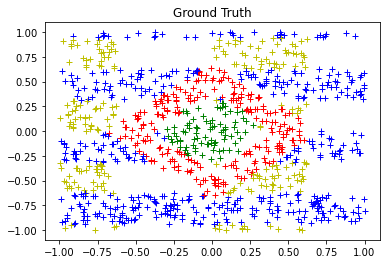

In [20]:
plt.title("Ground Truth")
tools.plot(x1_test, x2_test, labels_test)

In [18]:
pred = torch.Tensor(np.array([x1_test, x2_test]).T)
output = model(pred)
pred = output.max(1, keepdim=True)[1]

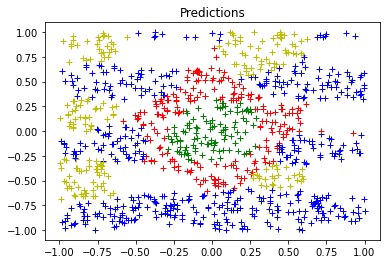

In [19]:
plt.title("Predictions")
tools.plot(x1_test, x2_test, pred)